In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [90]:
def euclidean_distance(x, y):
    """
    Calculate the Euclidean distance between two individuals.

    :param x: An individual.
    :param y: An individual.
    """
    # dont use the 0th element of the individual as it is the UserID
    x = np.array(x[1:])
    y = np.array(y[1:])
    return np.linalg.norm(x - y)

def B(x, delta, population, metric):
    """
    Find all members of the population that are within distance delta of x.

    :param x: An individual.
    :param delta: A radius.
    :param population: List of individuals in the population.
    :param metric: A function that calculates the metric of interest between two individuals.
    """
    B = []
    for i in population:
        if metric(x, i) <= delta:
            B.append(i)
    return B

def M(X, N):
    """
    Find the candidate individuals to add to the panel. i.e. the individuals in N that are not in X.

    :param X: The current panel.
    :param N: The remaining population.
    """
    candidates = []
    for i in N:
        if i not in X:
            candidates.append(i)
    return candidates

def greedy_capture(population, metric, k):
    delta = 0 # ball radius
    X = set() # panel

    N = population.copy()

    print("N: ", len(N))

    n = len(N)
    
    while len(N) > 0:
        # Smoothly increase delta - implement this according to your specific problem
        delta += 0.001
        # print("Delta: ", delta)
        
        for x in X: # continued capture
            B_x = B(x, delta, population, metric)
            # if len(B_x) >= 1:
            if len(set(B_x).intersection(set(N))) >= 1:
                for y in B_x:
                    #remove y from N
                    if y in N:
                        N.remove(y)
                # print("N: ", len(N))

        for i in M(X, N): # ball opening
           B_i = B(i, delta, population, metric)
           if len(set(B_i).intersection(set(N))) >= np.ceil(n/k):
               print("Center Opened: ", i)
               X.add(i)
               for j in B_i:
                   if j in N:
                       N.remove(j)

    return X

In [150]:
def euclidean_distance2(x, y):
    # Use numpy vectorization for faster computation
    return np.linalg.norm(np.array(x[1:]) - np.array(y[1:]))

def B2(x, delta, population, metric, distance_cache):
    B_set = set()
    x_key = tuple(x)
    for i in population:
        i_key = tuple(i)
        if (x_key, i_key) not in distance_cache:
            distance_cache[(x_key, i_key)] = metric(x, i)
        if distance_cache[(x_key, i_key)] <= delta:
            B_set.add(i_key)
    return B_set

def greedy_capture2(population, metric, k):
    delta = 0 # Initial ball radius
    X = set() # Panel as a set for faster operations

    N = set(tuple(ind) for ind in population)  # Convert population to set of tuples for quick removal and checks
    population_set = N.copy()  # Keep a full copy of population as set of tuples

    distance_cache = {}  # Cache distances to avoid recalculating

    n = len(N)
    
    while N:
        delta += 0.01  # Increment delta; adjust strategy as needed
        print("Delta: ", delta)

        removals = set()
        for x in X:
            B_x = B2(x, delta, population_set, metric, distance_cache)
            intersection = B_x.intersection(N)
            if intersection:
                removals.update(intersection)

        N.difference_update(removals)  # Remove all at once to reduce operations in the loop

        # Finding new centers to open
        candidate_centers = N - X  # Elements in N but not in X
        for i in candidate_centers:
            B_i = B2(i, delta, population_set, metric, distance_cache)
            if len(B_i.intersection(N)) >= np.ceil(n / k):
                X.add(i)
                N.difference_update(B_i)

    return [list(ind) for ind in X]

In [151]:
mm = pd.read_csv("Moral Machine Data/SharedResponsesSurvey_cleaned.csv")

In [152]:
# keep only one row for every UserID
mm = mm.drop_duplicates(subset='UserID', keep='first')
print(mm.shape)

(215378, 27)


In [153]:
# keep only UserID and 'Review_age', 'Review_education',
    #    'Review_gender', 'Review_income', 'Review_political',
    #    'Review_religious'

mm = mm[['UserID', 'Review_age', 'Review_education', 'Review_gender', 'Review_income', 'Review_political', 'Review_religious']]

In [156]:
people = mm.to_numpy()
print(people[0])

# make each row a tuple
people = [tuple(row) for row in people]

# get a random sample of 1000 people
np.random.seed(0)
# get random indices
indices = np.random.choice(len(people), 10_000, replace=False)
# get the people at those indices
people = [people[i] for i in indices]




[5.6038431e+15 2.0000000e-01 1.0000000e+00 0.0000000e+00 6.2500000e-01
 6.5000000e-01 0.0000000e+00]


In [157]:
import time

k = 20
# start = time.time()
# selected_representatives = greedy_capture(people, euclidean_distance, k)
# end = time.time()
# print("Time taken: ", end - start)
# print("Selected representatives: ", selected_representatives)

start = time.time()
selected_representatives = greedy_capture2(people, euclidean_distance2, k)
end = time.time()
print("Time taken: ", end - start)
print("Selected representatives: ", selected_representatives)

Delta:  0.01
Delta:  0.02
Delta:  0.03
Delta:  0.04
Delta:  0.05
Delta:  0.060000000000000005
Delta:  0.07
Delta:  0.08
Delta:  0.09
Delta:  0.09999999999999999
Delta:  0.10999999999999999
Delta:  0.11999999999999998
Delta:  0.12999999999999998
Delta:  0.13999999999999999
Delta:  0.15
Delta:  0.16
Delta:  0.17
Delta:  0.18000000000000002
Delta:  0.19000000000000003
Delta:  0.20000000000000004
Delta:  0.21000000000000005
Delta:  0.22000000000000006
Delta:  0.23000000000000007
Delta:  0.24000000000000007
Delta:  0.25000000000000006
Delta:  0.26000000000000006
Delta:  0.2700000000000001
Delta:  0.2800000000000001
Delta:  0.2900000000000001
Delta:  0.3000000000000001
Delta:  0.3100000000000001
Delta:  0.3200000000000001
Delta:  0.3300000000000001
Delta:  0.34000000000000014
Delta:  0.35000000000000014
Delta:  0.36000000000000015
Delta:  0.37000000000000016
Delta:  0.38000000000000017
Delta:  0.3900000000000002
Delta:  0.4000000000000002
Delta:  0.4100000000000002
Delta:  0.4200000000000002

In [158]:
print(len(selected_representatives))

8


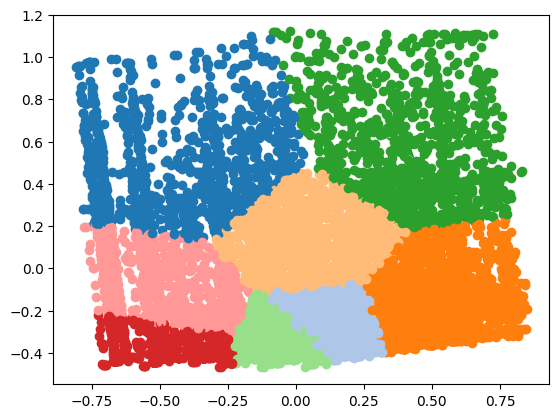

In [159]:
# we have to plot the 6d data in 2d
# we can use PCA to reduce the dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = [list(i[1:]) for i in people]
X = pca.fit_transform(X)

X = np.array(X)

# now do the same for the selected representatives
X_selected = [list(i[1:]) for i in selected_representatives]
X_selected = pca.transform(X_selected)

X_selected = np.array(X_selected)


# color each individual the same color as the selected representative they are closest to
# use tab20 colormap
colors = plt.cm.tab20(np.linspace(0, 1, k))

for i in range(len(X)):
    distances = [np.linalg.norm(X[i] - j) for j in X_selected]
    closest_rep = np.argmin(distances)
    plt.scatter(X[i][0], X[i][1], color=colors[closest_rep])

# plot the selected representatives in the same color
for i in range(len(X_selected)):
    plt.scatter(X_selected[i][0], X_selected[i][1], color=colors[i], marker='*', s=600)

plt.show()

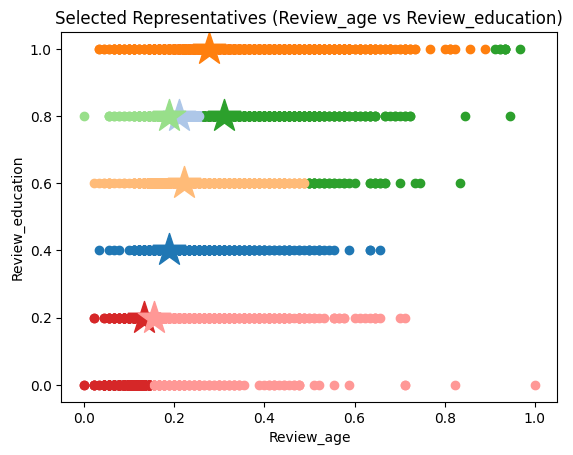

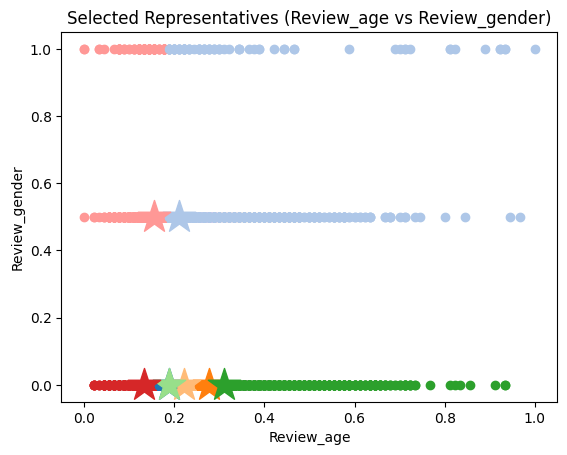

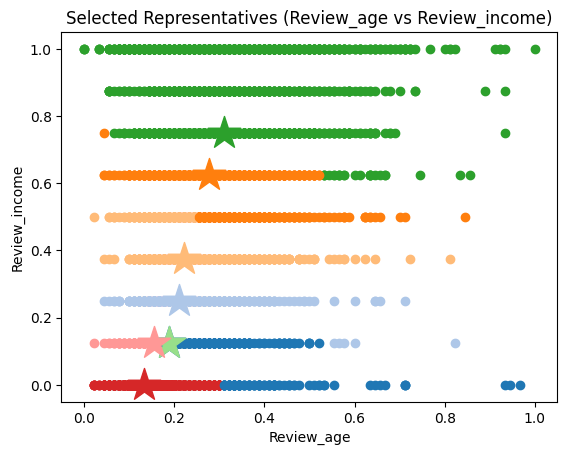

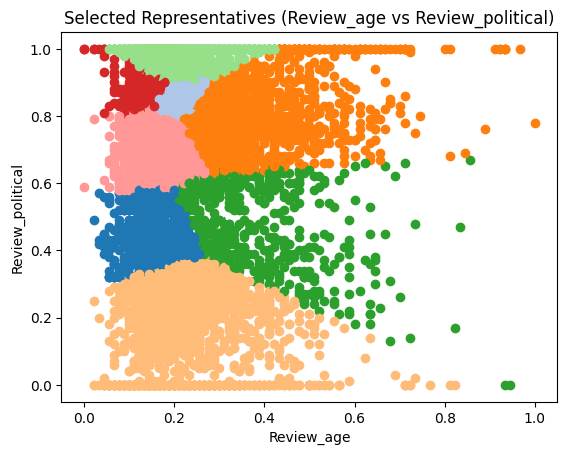

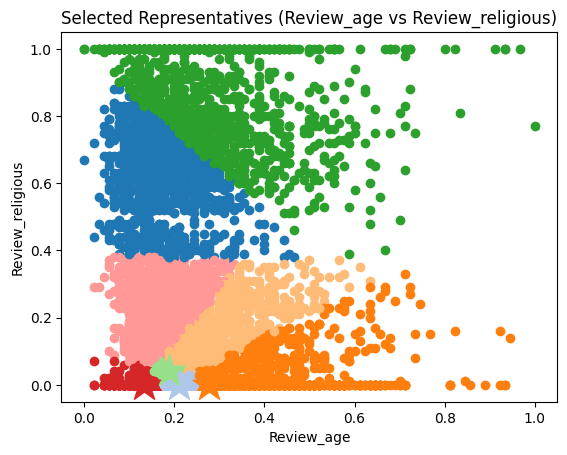

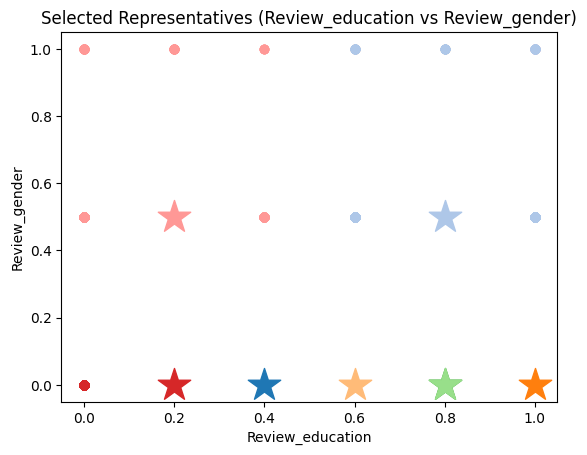

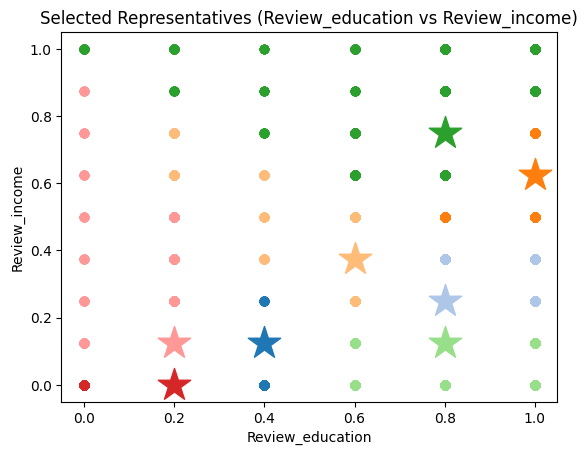

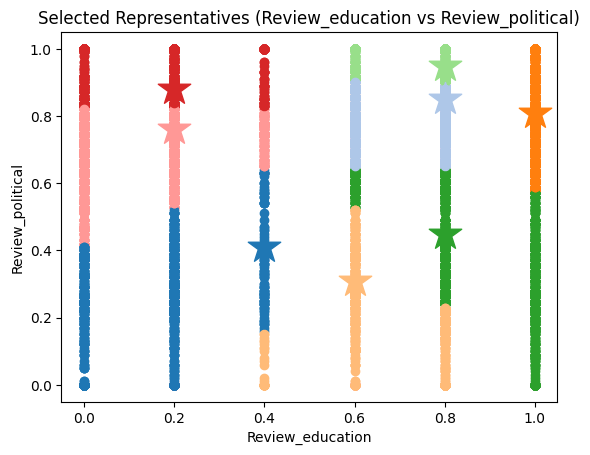

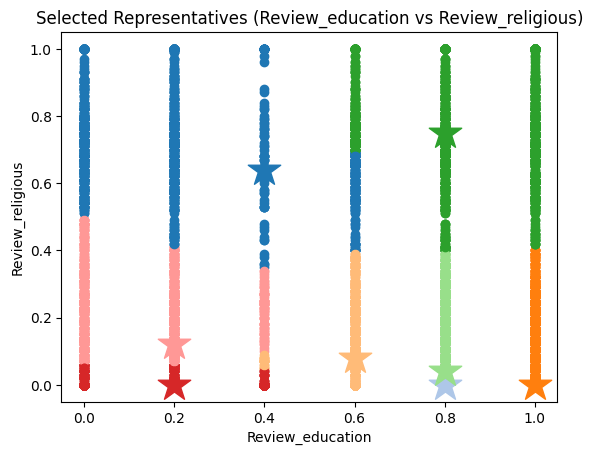

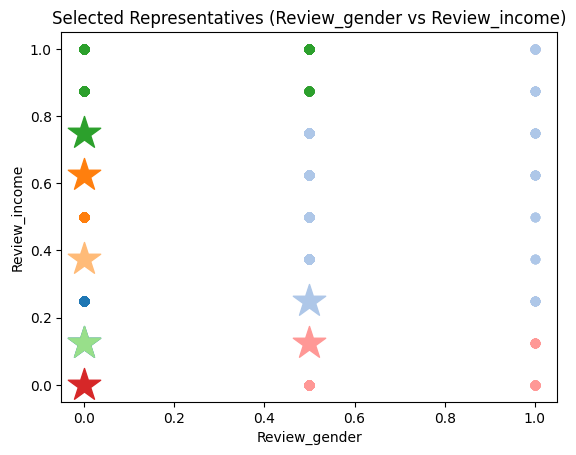

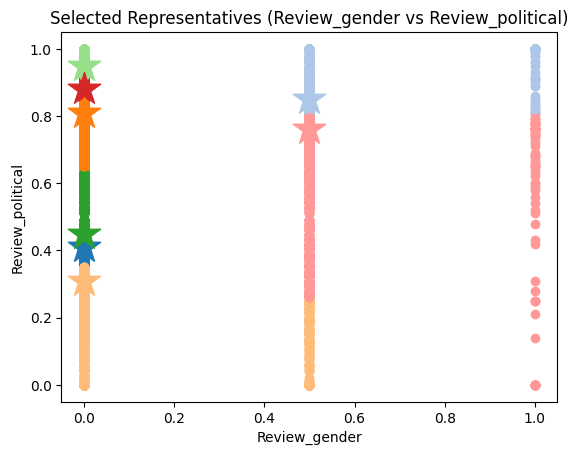

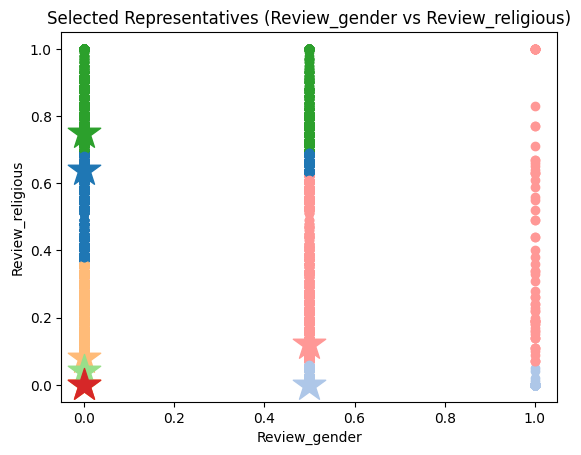

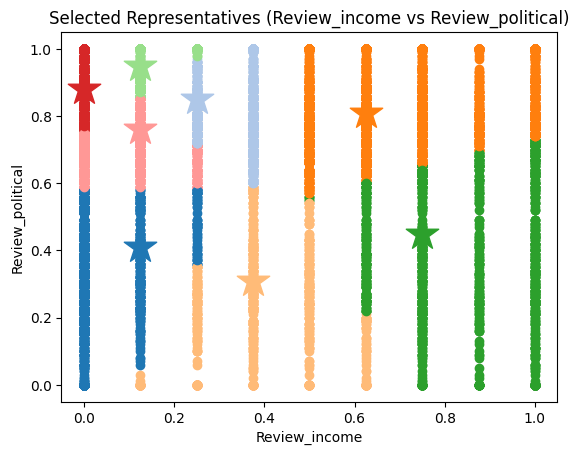

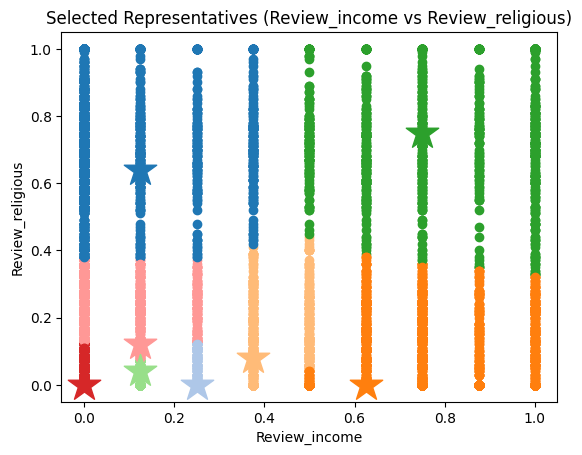

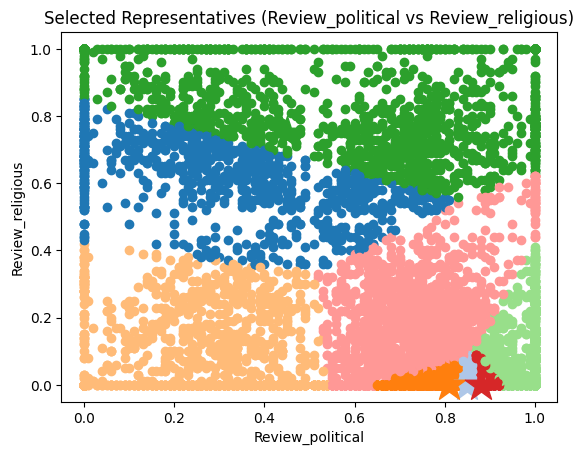

In [160]:
features = ['Review_age', 'Review_education', 'Review_gender', 'Review_income', 'Review_political', 'Review_religious']

pairs = list(itertools.combinations(range(1, 7), 2))

for pair in pairs:
    X = [list(i[1:]) for i in people]
    X = np.array(X)
    X = X[:, [pair[0]-1, pair[1]-1]]

    X_selected = [list(i[1:]) for i in selected_representatives]
    X_selected = np.array(X_selected)
    X_selected = X_selected[:, [pair[0]-1, pair[1]-1]]

    colors = plt.cm.tab20(np.linspace(0, 1, k))

    for i in range(len(X)):
        distances = [np.linalg.norm(X[i] - j) for j in X_selected]
        closest_rep = np.argmin(distances)
        plt.scatter(X[i][0], X[i][1], color=colors[closest_rep])

    for i in range(len(X_selected)):
        plt.scatter(X_selected[i][0], X_selected[i][1], color=colors[i], marker='*', s=600)

    plt.xlabel(features[pair[0]-1])
    plt.ylabel(features[pair[1]-1])
    plt.title("Selected Representatives (" + features[pair[0]-1] + " vs " + features[pair[1]-1] + ")")
    plt.show()

In [133]:
# find the person that is furthest from a panel member
max_distance = 0
max_distance_person = None
for person in people:
    distances = [np.linalg.norm(np.array(person[1:]) - np.array(i[1:])) for i in selected_representatives]
    min_distance = np.min(distances)
    if min_distance > max_distance:
        max_distance = min_distance
        max_distance_person = person

print("Max distance: ", max_distance)
print("Max distance person: ", max_distance_person)

Max distance:  1.178558441486887
Max distance person:  (9723908400342580.0, 0.1333333333333333, 0.0, 0.0, 1.0, 0.0, 1.0)


## Test UMAP

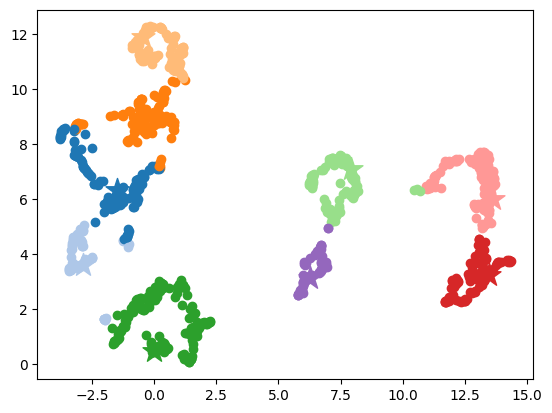

In [119]:
# now lets do it with UMAP
import umap
reducer = umap.UMAP()
X = [list(i[1:]) for i in people]
X = reducer.fit_transform(X)

X_selected = [list(i[1:]) for i in selected_representatives]
X_selected = reducer.transform(X_selected)

# color each individual the same color as the selected representative they are closest to
# use tab20 colormap
colors = plt.cm.tab20(np.linspace(0, 1, k))

for i in range(len(X)):
    distances = [np.linalg.norm(X[i] - j) for j in X_selected]
    closest_rep = np.argmin(distances)
    plt.scatter(X[i][0], X[i][1], color=colors[closest_rep])

# plot the selected representatives in the same color
for i in range(len(X_selected)):
    plt.scatter(X_selected[i][0], X_selected[i][1], color=colors[i], marker='*', s=300)

plt.show()